### Importing Libraries and data

In [1]:
import pandas as pd 
import numpy as np

In [2]:
sms= pd.read_csv('spam.csv',encoding = 'ISO-8859-1')

In [3]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Preprocessing

In [4]:
sms.shape

(5572, 5)

In [5]:
# removing unwanted columns
sms = sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# changing attributes names
sms.rename(columns={'v1':'spam_or_not', 'v2':'msg'}, inplace=True)
sms.columns

Index(['spam_or_not', 'msg'], dtype='object')

In [7]:
sms['spam_or_not'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
sms.describe()

,spam_or_not,msg
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
sms.isnull().sum()

spam_or_not    0
msg            0
dtype: int64

### Data Visualization

<Axes: xlabel='spam_or_not', ylabel='count'>

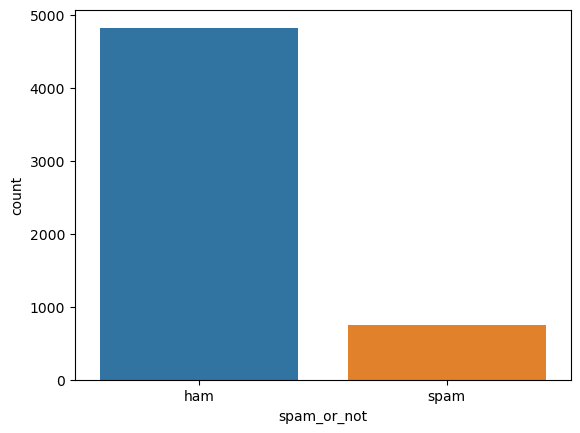

In [10]:
import seaborn as sns
sns.countplot(x='spam_or_not', data=sms)

In [11]:
sms.head()

,spam_or_not,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Training and Splitting the data

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
sms['spam_or_not'] = le.fit_transform(sms['spam_or_not'])
sms.head()

,spam_or_not,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
x=sms['msg']
y=sms['spam_or_not']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)
x_train_vecs = vectorizer.transform(x_train)
x_test_vecs = vectorizer.transform(x_test)

In [15]:
print(x_train_vecs)

  (0, 7674)	0.2780580098469636
  (0, 6786)	0.12427677819754165
  (0, 6455)	0.21083615486777574
  (0, 5872)	0.26710534096823246
  (0, 4988)	0.1903904544048287
  (0, 4912)	0.15957326527314455
  (0, 4773)	0.17659786192165677
  (0, 4661)	0.3714150879090969
  (0, 4646)	0.14901928724105368
  (0, 4549)	0.3610761139104893
  (0, 4390)	0.14278469554070108
  (0, 3637)	0.1356900314797867
  (0, 3416)	0.22465058036136068
  (0, 3308)	0.2780580098469636
  (0, 1758)	0.2736419760203263
  (0, 1415)	0.3714150879090969
  (0, 1105)	0.16911106738950407
  (1, 7152)	0.13192690604552595
  (1, 6781)	0.11591125876695066
  (1, 6639)	0.27079885833944156
  (1, 6494)	0.2473832281421039
  (1, 5178)	0.177668342459472
  (1, 5126)	0.18685470215123204
  (1, 5003)	0.1828758011561768
  (1, 4986)	0.15977442079298718
  :	:
  (4452, 1833)	0.29751311096286004
  (4452, 1628)	0.3213332406530875
  (4452, 1608)	0.1741191267977231
  (4452, 1298)	0.2860990438603183
  (4453, 6299)	0.5422825367621465
  (4453, 4147)	0.4831266135229213
 

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression()
LR_model.fit(x_train_vecs,y_train)

LogisticRegression()

In [17]:
from sklearn.metrics import accuracy_score
y_pred = LR_model.predict(x_test_vecs)
acc=accuracy_score(y_pred,y_test)
print(acc)

0.9659192825112107


In [18]:
from sklearn.metrics import accuracy_score , classification_report
acc = accuracy_score(y_pred,y_test)
print("accuracy :",acc)
print(classification_report(y_pred,y_test))

accuracy : 0.9659192825112107
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1001
           1       0.75      0.99      0.86       114

    accuracy                           0.97      1115
   macro avg       0.88      0.98      0.92      1115
weighted avg       0.97      0.97      0.97      1115



### Navie Bayes Classifier

In [19]:
from sklearn.naive_bayes import MultinomialNB
MNB_model= MultinomialNB()
MNB_model.fit(x_train_vecs,y_train)

MultinomialNB()

In [20]:
y_pred = MNB_model.predict(x_test_vecs)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [21]:
from sklearn.metrics import accuracy_score , classification_report
acc = accuracy_score(y_pred,y_test)
print("accuracy :",acc)
print(classification_report(y_pred,y_test))

accuracy : 0.9623318385650225
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1007
           1       0.72      1.00      0.84       108

    accuracy                           0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.96      1115



### Support Vector Machine

In [22]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report
svc_model=LinearSVC()
svc_model.fit(x_train_vecs,y_train)

LinearSVC()

In [23]:
y_pred = svc_model.predict(x_test_vecs)
print("Validation Accuracy:", accuracy_score(y_test, y_pred))
print("Validation Classification Report:\n", classification_report(y_test, y_pred))

Validation Accuracy: 0.9829596412556054
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [24]:
# Pre-trained model
pred_model = svc_model # MNB_model , # lR_model 
example = [
  "Your account have 100 debeted, is waiting to be collected. Simply text the password \MIX\" to 85069 to verify. Get Usher and Britney. FML"
]

example_vecs = vectorizer.transform(example)

predictions = pred_model.predict(example_vecs)

for sentence, prediction in zip(example, predictions):
    if prediction == 1:
        print("Spam Message")
    else:
        print("Not Spam Message")

Spam Message
